<a href="https://colab.research.google.com/github/Sameer-Tahir/Project_DS/blob/main/HPC_Kernel_Combined/Kernel_Logs/Analysis_of_Dataset_Kernel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/Sameer-Tahir/Project_DS.git

Cloning into 'Project_DS'...
remote: Enumerating objects: 123, done.
remote: Counting objects: 100% (123/123), done.
remote: Compressing objects: 100% (119/119), done.
remote: Total 123 (delta 42), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (123/123), 14.76 MiB | 8.13 MiB/s, done.
Resolving deltas: 100% (42/42), done.


In [ ]:
import pandas as pd   # data processing & analysis
import numpy as np    # numerical computations
import seaborn as sns  # visualization
import matplotlib.pyplot as plt  # plotting

In [ ]:
df = pd.read_csv("/content/kernel_events_cleaned.csv")  #Load Dataset
print("Dataset shape:", df.shape)

In [ ]:
df

,time,alarmtimer_alarmtimer_cancel,alarmtimer_alarmtimer_fired,alarmtimer_alarmtimer_start,alarmtimer_alarmtimer_suspend,alignment-faults,ase_spec,block_block_bio_backmerge,block_block_bio_bounce,block_block_bio_complete,...,writeback_writeback_wait_iff_congested,writeback_writeback_wake_background,writeback_writeback_write_inode,writeback_writeback_write_inode_start,writeback_writeback_written,State,Attack,Scenario,Label,interface
0,5.001477,0,0,0,0,0,693371795,0,0,0,...,0,0,0,0,0,Charging,cryptojacking,Cryptojacking,attack,any
1,5.001487,0,0,0,0,0,699964025,0,0,0,...,0,0,0,0,0,Charging,cryptojacking,Cryptojacking,attack,any
2,5.001641,0,0,0,0,0,549770341,0,0,0,...,0,0,0,0,0,Charging,cryptojacking,Cryptojacking,attack,any
3,5.003762,0,0,0,0,0,571970875,0,0,0,...,0,0,0,0,0,Charging,cryptojacking,Cryptojacking,attack,any
4,10.065740,0,0,0,0,0,553199786,0,0,0,...,0,0,0,0,0,Charging,cryptojacking,Cryptojacking,attack,any
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6161,283.646045,0,0,0,0,0,5463807,0,0,0,...,0,0,0,0,0,Charging,synonymous-ip-flood,DoS,attack,ocpp
6162,288.714173,0,0,0,0,0,10977108,0,0,0,...,0,0,0,0,0,Charging,synonymous-ip-flood,DoS,attack,ocpp
6163,293.790086,0,0,0,0,0,3683292,0,0,0,...,0,0,0,0,0,Charging,synonymous-ip-flood,DoS,attack,ocpp
6164,298.861925,0,0,0,0,0,5165840,0,0,0,...,0,0,0,0,0,Charging,synonymous-ip-flood,DoS,attack,ocpp


In [ ]:
print("Column Data Types:")  # Data types overview
print(df.dtypes)

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

print(f"\nNumber of numerical columns: {len(numerical_cols)}") # Numerical & categorical columns
print(f"Number of categorical columns: {len(categorical_cols)}")
print("Categorical columns:", categorical_cols.tolist())

for col in categorical_cols:
    print(f"\nUnique values in '{col}': {df[col].unique()}")  # Categorical variables

Column Data Types:
time                             float64
alarmtimer_alarmtimer_cancel       int64
alarmtimer_alarmtimer_fired        int64
alarmtimer_alarmtimer_start        int64
alarmtimer_alarmtimer_suspend      int64
                                  ...   
State                             object
Attack                            object
Scenario                          object
Label                             object
interface                         object
Length: 911, dtype: object


In [ ]:
def check_zero_columns(df, name="Kernel"):  # Identify Zero / Mixed Columns
    all_zero_cols = []
    mixed_cols = []

    for col in df.columns:
        # Skip categorical columns (object/string type)
        if df[col].dtype == 'object':
            continue

        # Check if column is all null
        if df[col].isnull().all():
            all_zero_cols.append(col)
        # Check if column is all 0
        elif (df[col] == 0).all():
            all_zero_cols.append(col)
        # Check if column has some 0 and some non-0
        elif (df[col] == 0).any():
            mixed_cols.append(col)

    print(f"\n--- {name} ---")
    print(f"Columns ALL zero/null ({len(all_zero_cols)}): {all_zero_cols}")
    print(f"Columns with MIXED values (zeros + non-zeros) ({len(mixed_cols)}): {mixed_cols}")

# Run for both datasets
check_zero_columns(df, "Kernel Events")


--- Kernel Events ---
Columns ALL zero/null (685): ['alarmtimer_alarmtimer_cancel', 'alarmtimer_alarmtimer_fired', 'alarmtimer_alarmtimer_start', 'alarmtimer_alarmtimer_suspend', 'alignment-faults', 'block_block_bio_bounce', 'block_block_bio_complete', 'block_block_bio_frontmerge', 'block_block_rq_merge', 'block_block_rq_remap', 'block_block_rq_requeue', 'block_block_split', 'bpf-output', 'bus_access_shared', 'cid_write_retired', 'clk_clk_disable', 'clk_clk_disable_complete', 'clk_clk_enable', 'clk_clk_enable_complete', 'clk_clk_prepare', 'clk_clk_prepare_complete', 'clk_clk_set_duty_cycle', 'clk_clk_set_duty_cycle_complete', 'clk_clk_set_max_rate', 'clk_clk_set_min_rate', 'clk_clk_set_parent', 'clk_clk_set_parent_complete', 'clk_clk_set_phase', 'clk_clk_set_phase_complete', 'clk_clk_set_rate', 'clk_clk_set_rate_complete', 'clk_clk_set_rate_range', 'clk_clk_unprepare', 'clk_clk_unprepare_complete', 'crypto_spec', 'dummy', 'emulation-faults', 'exc_fiq', 'exc_hvc', 'exc_smc', 'exc_trap_

Dataset composition:

Shape: (rows, 911 columns).

906 numerical features, 5 categorical (State, Attack, Scenario, Label, interface).

Categories:

State: Charging / Idle.

Attack: 18+ attack types (cryptojacking, port-scan, DoS, etc.).

Scenario: Benign, Recon, DoS, Cryptojacking.

Label: Binary (attack / benign).

Zero columns:

685 columns are completely zero or null → safe to drop.

136 columns have a mix of zeros and valid values (e.g., context-switches, page-faults, sched_sched_switch) → important system-level indicators.

In [ ]:
df = df.loc[:, (df != 0).any(axis=0)]
print("Dataset shape after removing all-zero columns:", df.shape)
print("\nLabel counts:\n", df['Label'].value_counts())
print("\nScenario counts:\n", df['Scenario'].value_counts())
print("\nAttack type counts:\n", df['Attack'].value_counts())
print("\nInterface counts:\n", df['interface'].value_counts())

In [ ]:
df_idle = df[df['State'] == 'idle']  # Separate Charging vs Idle States
df_charging = df[df['State'] == 'Charging']

idle_attack = df_idle[df_idle['Label'] == 'attack'] # Further split into benign/attack subsets
idle_benign = df_idle[df_idle['Label'] == 'benign']
charging_attack = df_charging[df_charging['Label'] == 'attack']
charging_benign = df_charging[df_charging['Label'] == 'benign']

print(f"Idle samples: {len(df_idle)}  (Attack: {len(idle_attack)}, Benign: {len(idle_benign)})")
print(f"Charging samples: {len(df_charging)}  (Attack: {len(charging_attack)}, Benign: {len(charging_benign)})")

In [ ]:
df['Label_num'] = df['Label'].map({'benign': 0, 'attack': 1}) # Encode Binary Label Map 'benign' → 0, 'attack' → 1 for correlation analysis

In [ ]:
def label_corr(df_group, threshold_high=0.5, threshold_low=0.05):


    numeric_cols = df_group.select_dtypes(include='number').columns  # Select numeric columns, drop label itself
    numeric_cols = numeric_cols.drop('Label_num', errors='ignore')


    numeric_cols = numeric_cols[df_group[numeric_cols].std() != 0] # Remove zero-variance features


    corr_with_label = df_group[numeric_cols].corrwith(df_group['Label_num']).abs()  # Absolute correlation with label

    high_corr = corr_with_label[corr_with_label > threshold_high].index.tolist()
    low_corr = corr_with_label[corr_with_label < threshold_low].index.tolist()

    return corr_with_label, high_corr, low_corr

In [ ]:
df_idle = df[df['State'] == 'idle']  # Separate Charging vs Idle States
df_charging = df[df['State'] == 'Charging']


idle_attack = df_idle[df_idle['Label'] == 'attack'] # split into benign/attack subsets
idle_benign = df_idle[df_idle['Label'] == 'benign']
charging_attack = df_charging[df_charging['Label'] == 'attack']
charging_benign = df_charging[df_charging['Label'] == 'benign']

print(f"Idle samples: {len(df_idle)}  (Attack: {len(idle_attack)}, Benign: {len(idle_benign)})")
print(f"Charging samples: {len(df_charging)}  (Attack: {len(charging_attack)}, Benign: {len(charging_benign)})")

In [ ]:
def label_corr(df_group, threshold_high=0.5, threshold_low=0.05):


    numeric_cols = df_group.select_dtypes(include='number').columns # Select numeric columns, drop label itself
    numeric_cols = numeric_cols.drop('Label_num', errors='ignore')


    numeric_cols = numeric_cols[df_group[numeric_cols].std() != 0]   # Remove zero-variance features


    corr_with_label = df_group[numeric_cols].corrwith(df_group['Label_num']).abs()   # Absolute correlation with label

    high_corr = corr_with_label[corr_with_label > threshold_high].index.tolist()
    low_corr = corr_with_label[corr_with_label < threshold_low].index.tolist()

    return corr_with_label, high_corr, low_corr

In [ ]:
idle_attack_corr, high_idle_attack, low_idle_attack = label_corr(idle_attack)
idle_benign_corr, high_idle_benign, low_idle_benign = label_corr(idle_benign)
charging_attack_corr, high_charging_attack, low_charging_attack = label_corr(charging_attack)
charging_benign_corr, high_charging_benign, low_charging_benign = label_corr(charging_benign)

print("\nIdle Attack: High correlated features →", high_idle_attack[:10])
print("Idle Benign: High correlated features →", high_idle_benign[:10])
print("Charging Attack: High correlated features →", high_charging_attack[:10])
print("Charging Benign: High correlated features →", high_charging_benign[:10])

Dropped 685 all-zero columns → reduced feature space significantly, keeping only informative ones.

Dataset balance:

Labels: 3864 attack, 2302 benign.

Scenarios: Most frequent are Benign (2302) and Cryptojacking (1793). DoS and Recon are smaller.

Attack types are highly imbalanced: e.g., cryptojacking (1793) dominates, while os-scan (59) is rare.

State-specific subsets: Dataset naturally splits into Charging vs Idle modes, each with distinct attack/benign behavior.

Correlation analysis: Identified numeric features with strong relationship to Label_num (attack vs benign). Many weakly correlated features can potentially be dropped in feature selection.

Warnings during correlation: Some features had zero variance within subsets, leading to NaN in correlation (handled by excluding zero-variance features).

/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


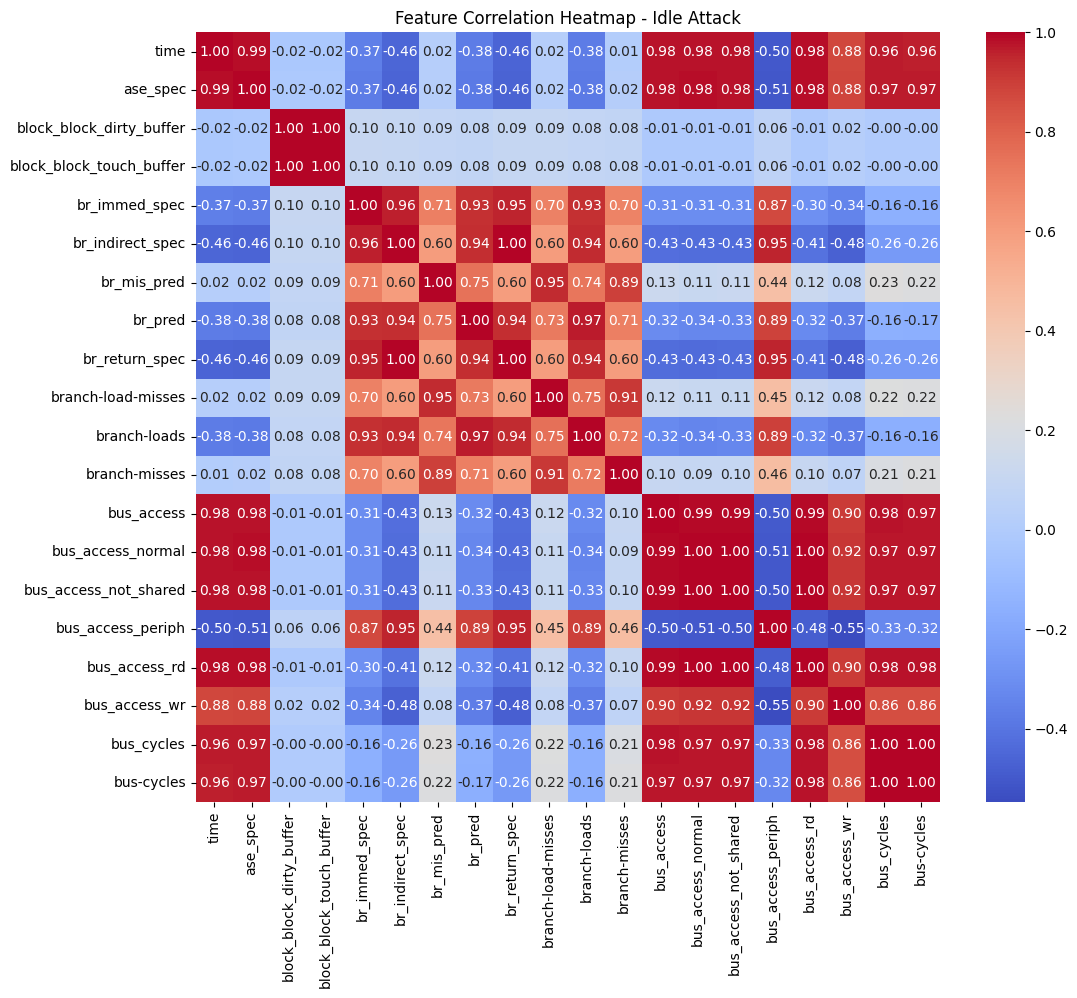

/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


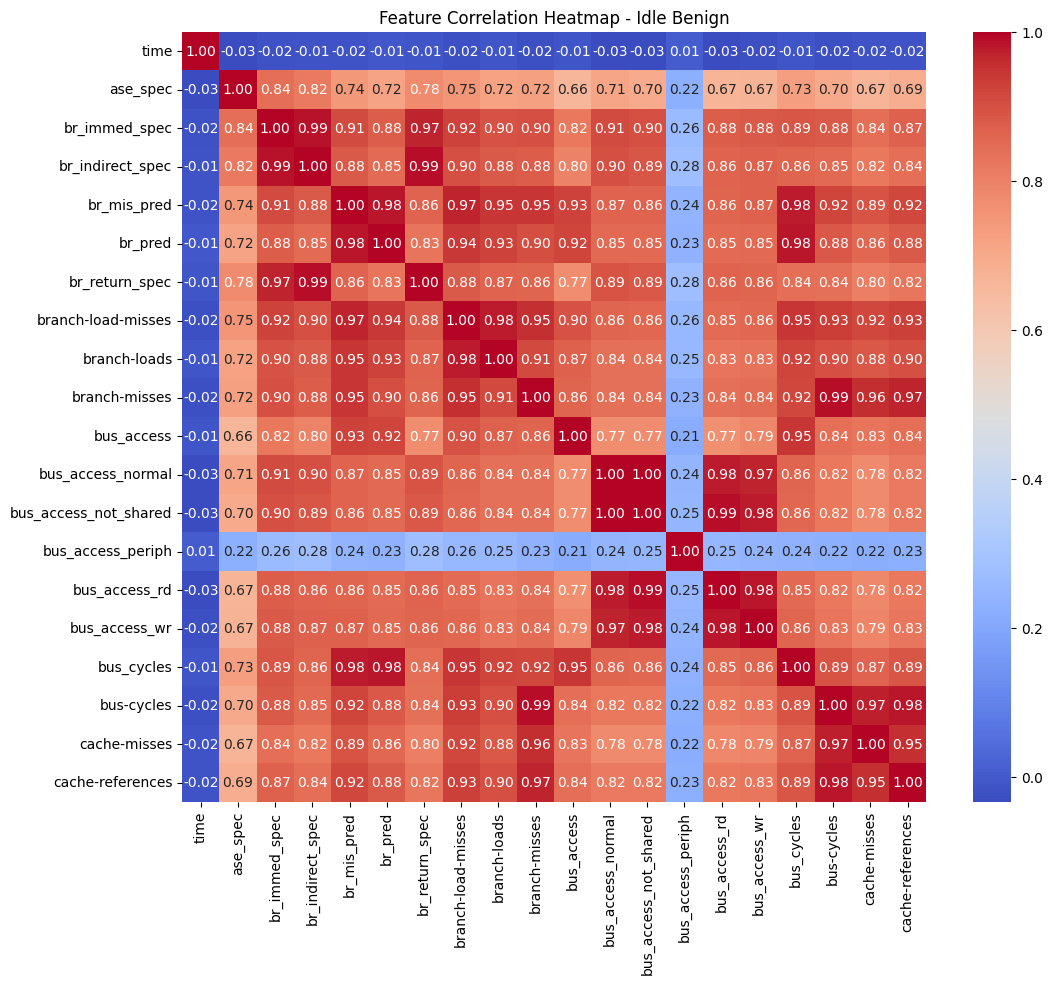

/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


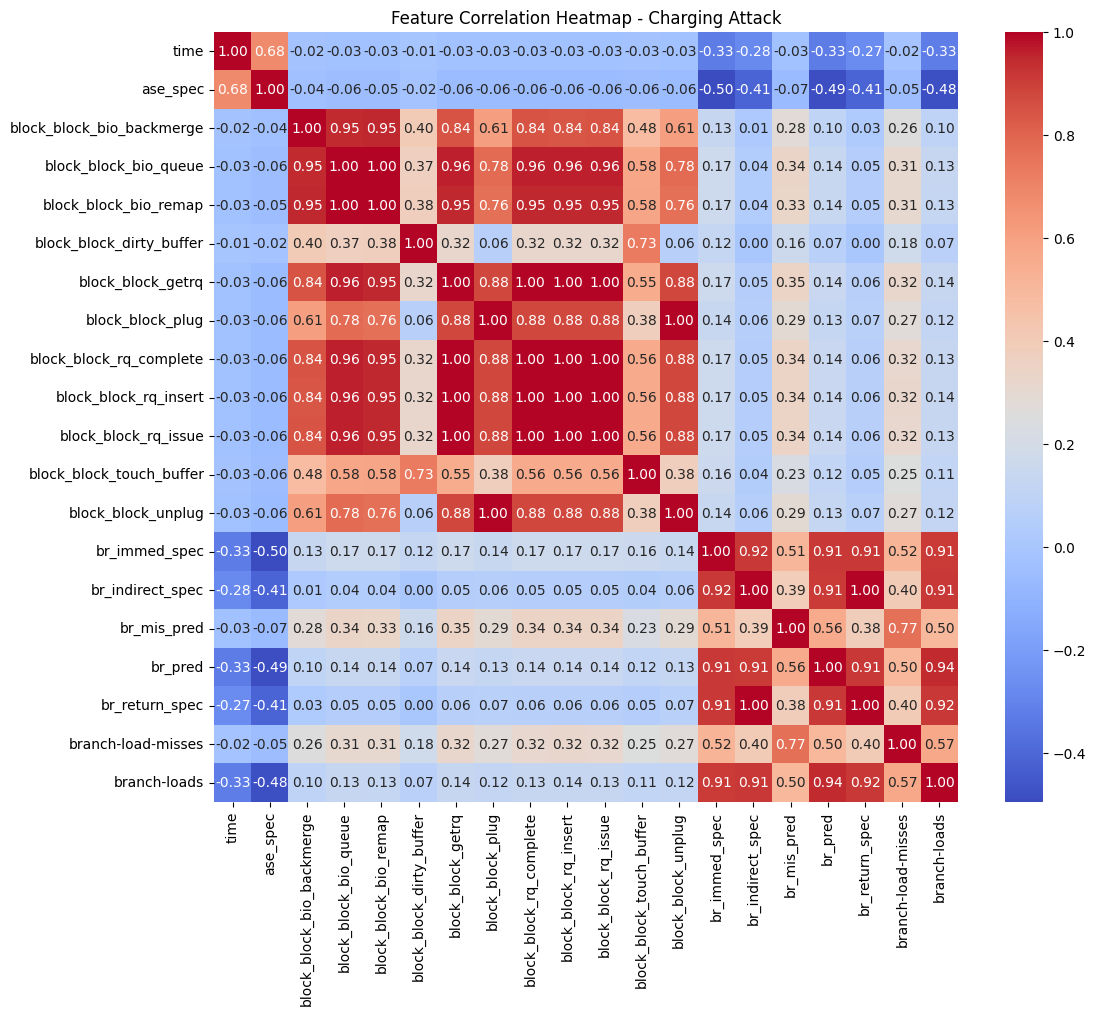

/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


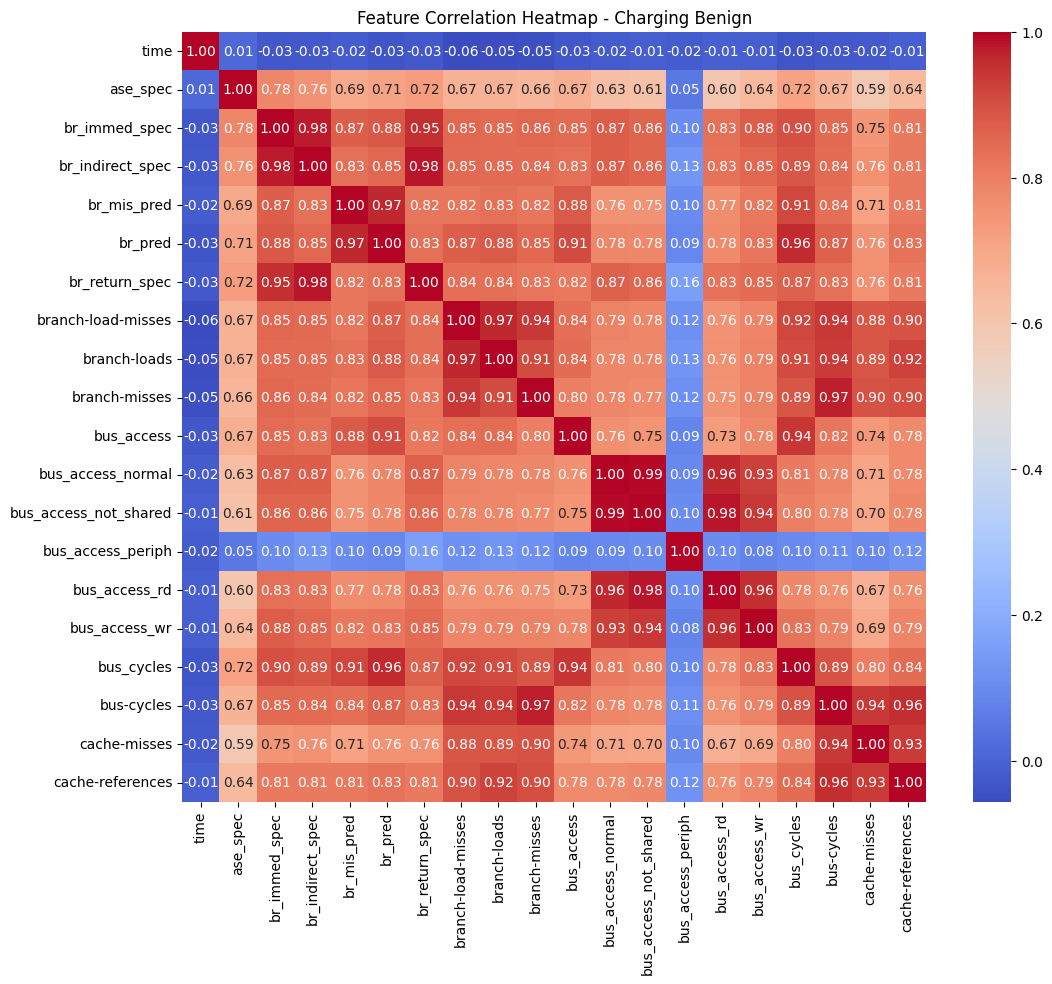

In [ ]:
def plot_feature_heatmap(df_group, title, top_n=20):

    numeric_cols = df_group.select_dtypes(include='number').columns   # Keep only numeric cols with non-zero variance
    numeric_cols = numeric_cols[df_group[numeric_cols].std() != 0]


    corr_with_label = df_group[numeric_cols].corrwith(df_group['Label_num']).abs()  # Correlation with label
    top_features = corr_with_label.sort_values(ascending=False).head(top_n).index


    corr_matrix = df_group[top_features].corr()  # Compute correlation matrix of these top features

    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
    plt.title(title)
    plt.show()

plot_feature_heatmap(idle_attack, "Feature Correlation Heatmap - Idle Attack")  # Example: heatmap for Idle Attack top 20 features
plot_feature_heatmap(idle_benign, "Feature Correlation Heatmap - Idle Benign")
plot_feature_heatmap(charging_attack, "Feature Correlation Heatmap - Charging Attack")
plot_feature_heatmap(charging_benign, "Feature Correlation Heatmap - Charging Benign")

Feature heatmaps:
Plotted correlation heatmaps of the top 20 features most related to the label in each subset (idle_attack, idle_benign, charging_attack, charging_benign).
→ Helps identify clusters of features that move together, revealing redundancy or dependencies.

Extended correlation analysis:

Extracted both positively correlated features (strongly linked with attack presence).

Extracted negatively correlated features (features whose absence/low activity may indicate attack).

Different subsets (charging vs idle, attack vs benign) showed different sets of high-impact features.